# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
c = pd.read_csv('input/demo02.csv')

Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau``` e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
y = c.mau
x = c.drop('mau', axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.

In [5]:
clf = DecisionTreeClassifier(random_state=100)

2. Treine o modelo com os dados que você separou para treinamento.

In [6]:
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.

[Text(0.6310061530588063, 0.9791666666666666, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.33012311395408384, 0.9375, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.2195209838356433, 0.8958333333333334, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.061366806136680614, 0.8541666666666666, 'educacao <= 1.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.04602510460251046, 0.8125, 'idade <= 30.137\ngini = 0.084\nsamples = 387\nvalue = [370, 17]\nclass = Aprovados'),
 Text(0.03486750348675035, 0.7708333333333334, 'tempo_emprego <= 0.693\ngini = 0.071\nsamples = 380\nvalue = [366, 14]\nclass = Aprovados'),
 Text(0.02092050209205021, 0.7291666666666666, 'sexo_F <= 0.5\ngini = 0.15\nsamples = 86\nvalue = [79, 7]\nclass = Aprovados'),
 Text(0.015341701534170154, 0.6875, 'tipo_renda <= 2.5\ngini 

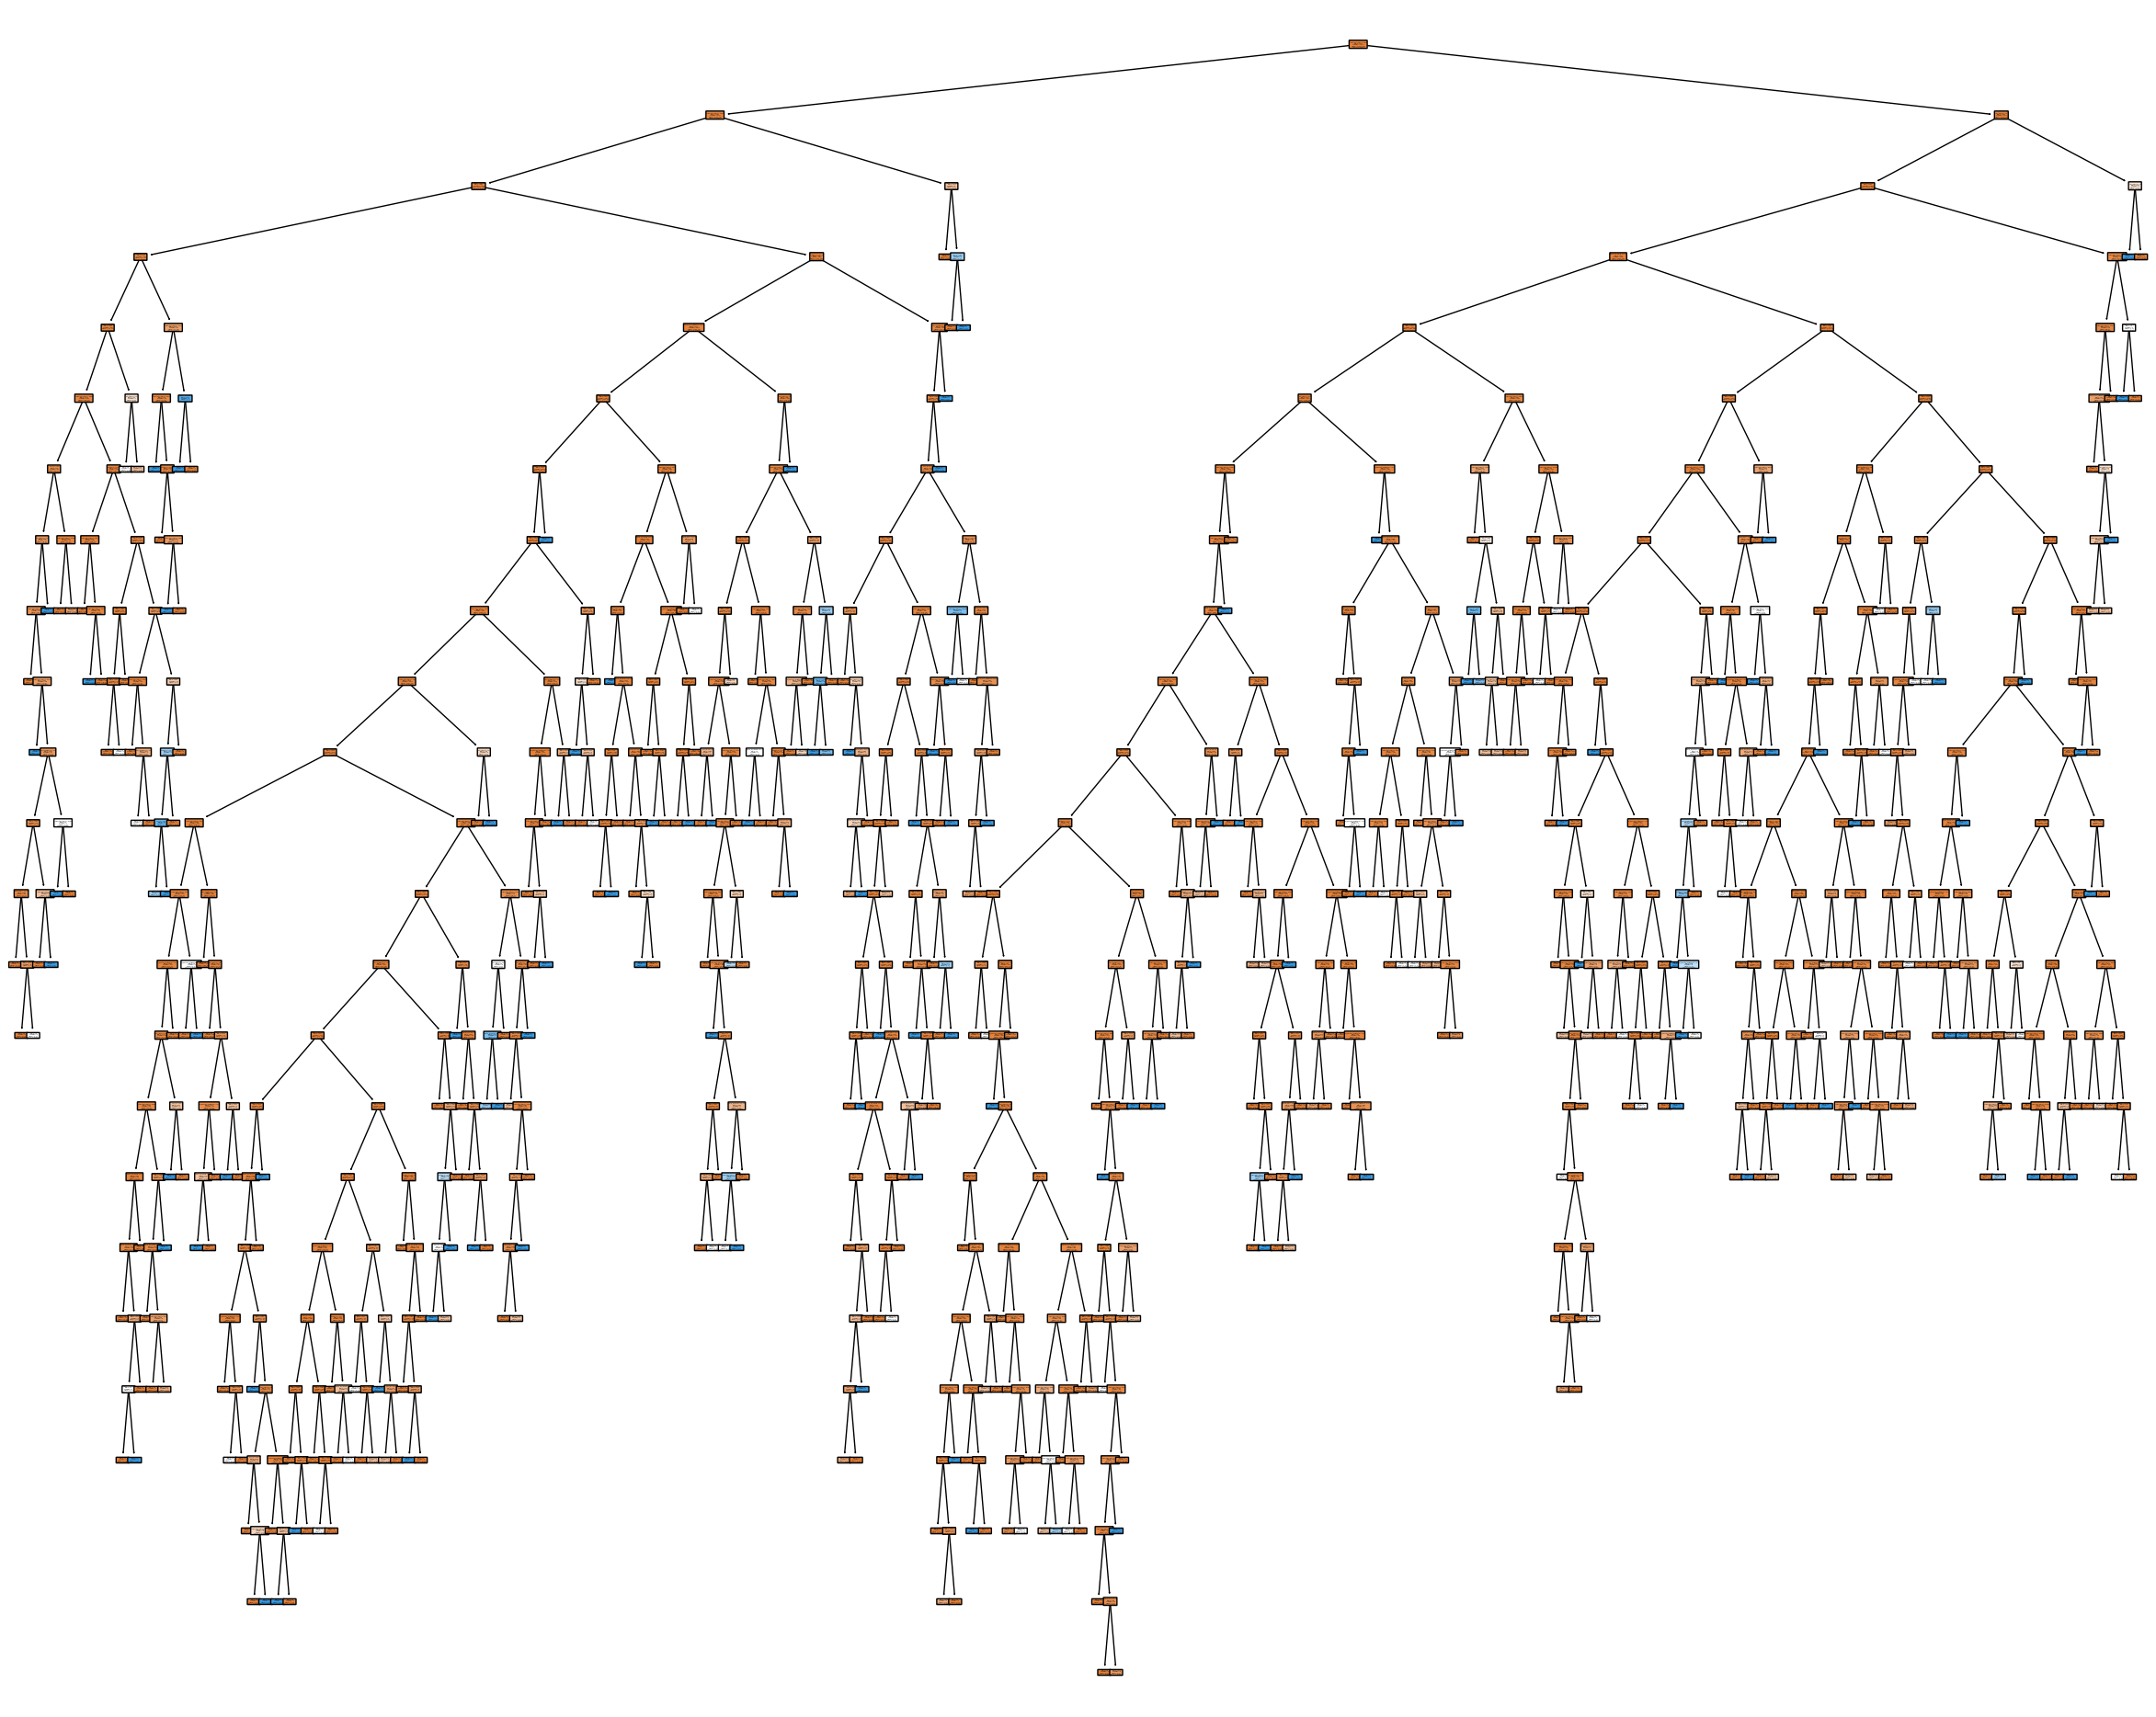

In [7]:
plt.figure(figsize=(30, 24))
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['Aprovados', 'Reprovados'],
    feature_names=x.columns
)

4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.


/Users/raphaeloliveira/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


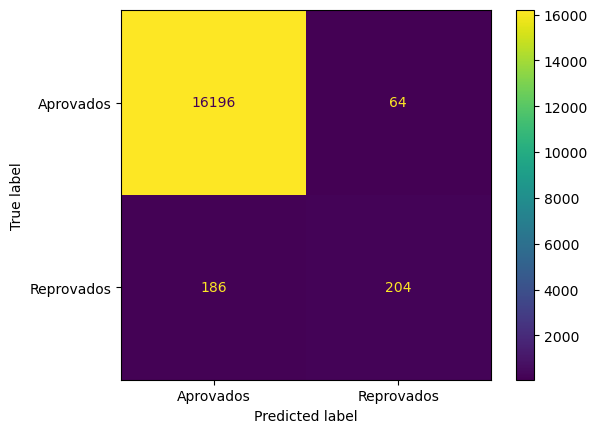

In [8]:
plot_confusion_matrix(clf, x, y, display_labels=['Aprovados', 'Reprovados'])

5. Calcule a acurácia na base de treinamento

In [13]:
# calculado a acurácia da base de treinanmento
pred = clf.predict(x)
accuracy_score(y, pred)

0.9735735735735735

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [23]:
clf2 = DecisionTreeClassifier(random_state=100)

In [24]:
clf2 = clf2.fit(x_test, y_test)
clf2

DecisionTreeClassifier(random_state=100)

/Users/raphaeloliveira/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


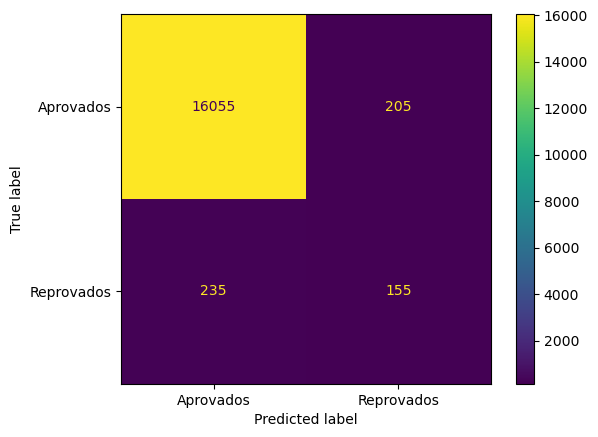

In [25]:
plot_confusion_matrix(clf2, x, y, display_labels=['Aprovados', 'Reprovados'])

In [26]:
# calculado a acurácia da base de teste
pred2 = clf2.predict(x)
accuracy_score(y, pred2)

0.9735735735735735

In [20]:
clf3 = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)

In [21]:
clf3 = clf3.fit(x_test, y_test)
clf3

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

/Users/raphaeloliveira/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


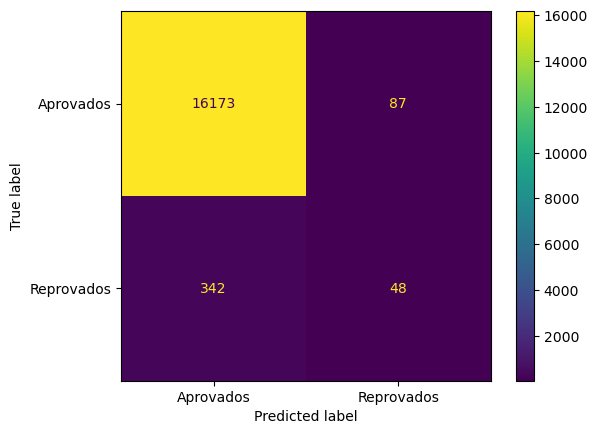

In [27]:
plot_confusion_matrix(clf3, x, y, display_labels=['Aprovados', 'Reprovados'])

In [28]:
# calculado a acurácia da base de cll3
pred3 = clf3.predict(x)
accuracy_score(y, pred3)

0.9742342342342343